In [50]:
import pandas as pd

import numpy as np

import warnings



warnings.filterwarnings('ignore')

**1. K-Means Clustering**

In [51]:
kmeans_df = pd.read_csv('/kaggle/input/final-merged-df/final_merged_df.csv')



print(kmeans_df.shape)

kmeans_df.isna().sum()

(1158540, 26)


Latitude               0
Longitude              0
Pop_Density_2000       0
Pop_Density_2001       0
Pop_Density_2002       0
Pop_Density_2003       0
Pop_Density_2004       0
Pop_Density_2005       0
Pop_Density_2006       0
Pop_Density_2007       0
Pop_Density_2008       0
Pop_Density_2009       0
Pop_Density_2010       0
Pop_Density_2011       0
Pop_Density_2012       0
Pop_Density_2013       0
Pop_Density_2014       0
Pop_Density_2015       0
Pop_Density_2016       0
Pop_Density_2017       0
Pop_Density_2018       0
Pop_Density_2019       0
Pop_Density_2020       0
Wind_Speed             0
Grid_Value             0
Income_Distribution    0
dtype: int64

**Objective 1**



Identify regions with sparse grid infrastructure and high population density where wind farms and microgrids could be feasible. This will be determined by analyzing population density projections, income distribution, and wind speed.



The **K-Means clustering algorithm** will be used for this objective.

In [52]:
from sklearn.preprocessing import LabelEncoder



# Label encode categorical variables



# Income_Distribution

income_encoder = LabelEncoder()

kmeans_df['Income_Distribution'] = income_encoder.fit_transform(kmeans_df['Income_Distribution'])



# Grid_Value

grid_encoder = LabelEncoder()

kmeans_df['Grid_Value'] = grid_encoder.fit_transform(kmeans_df['Grid_Value'])

In [53]:
from sklearn.preprocessing import StandardScaler



# Normalize clustering features



# Clustering features

features = kmeans_df[['Pop_Density_2020', 'Wind_Speed', 'Latitude', 'Longitude', 'Income_Distribution', 'Grid_Value']]



scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)


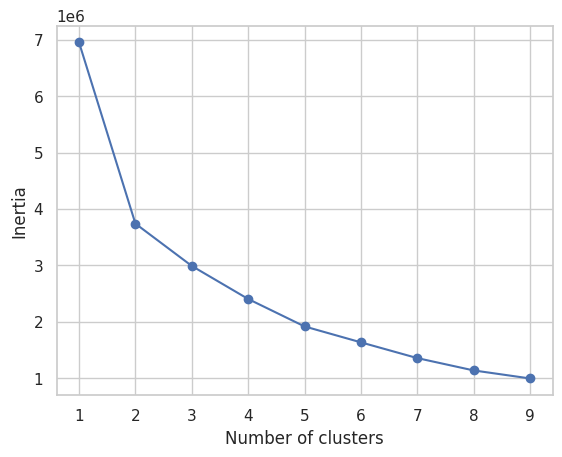

In [54]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt



# Finding optimal number of clusters

inertia = []

for k in range(1, 10):

    kmeans = KMeans(n_clusters=k, random_state=0)

    kmeans.fit(scaled_features)

    inertia.append(kmeans.inertia_)



# Plot elbow graph

plt.plot(range(1, 10), inertia, marker='o')

plt.xlabel('Number of clusters')

plt.ylabel('Inertia')

plt.show()

From the above visualization, using 2 clusters is the optimal choice for segmenting regions based on grid infrastructure sparsity and wind microgrid feasibility.

In [55]:
# Fit with optimal number of clusters

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans_df['Cluster'] = kmeans.fit_predict(scaled_features)



kmeans_df[['Latitude', 'Longitude', 'Pop_Density_2020', 'Wind_Speed', 'Grid_Value', 'Income_Distribution', 'Cluster']]

kmeans_df.head()

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Pop_Density_2015,Pop_Density_2016,Pop_Density_2017,Pop_Density_2018,Pop_Density_2019,Pop_Density_2020,Wind_Speed,Grid_Value,Income_Distribution,Cluster
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011,6.410498,0,42,0
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807,6.410498,0,42,0
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050,6.410498,0,42,0
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067,6.410498,0,42,0
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289,6.410498,0,42,0


**Explore cluster characteristics**

In [56]:
# Group by the cluster and calculate the mean of each feature

cluster_summary = kmeans_df.groupby('Cluster')[['Pop_Density_2020', 'Wind_Speed', 'Grid_Value', 'Income_Distribution']].mean()



# Print cluster summary

print(cluster_summary)


         Pop_Density_2020  Wind_Speed  Grid_Value  Income_Distribution
Cluster                                                               
0               95.189845    6.136823    0.000096            41.998844
1               94.168520    5.803629    0.552448            21.064718


**Findings**



1. *Cluster 0*



* The areas in cluster 0 are **relatively densely populated** with approximately 95.19 people per square kilometers.



* The wind conditions in this cluster are slightly stronger than in Cluster 1, with an average speed of 6.14 m/s at 100 meters above ground level. Therefore, these regions are suitable for both **wind farms and wind microgrids**.



* The grid infrastructure in Cluster 0 is significantly limited, with a value of 0.000096. Given the region's population density, there is clearly **high demand for electricity but limited distribution capacity**.



* The average income distribution of Cluster 0 is 41.999, indicating that approximately **50% of the population lives below the $2.15 poverty line**. Therefore, this cluster has a higher proportion of people living in poverty.





2. *Cluster 1*



* Compared to Cluster 0, the regions in Cluster 1 have a **slightly lower population density** of 94.17 people per square kilometer.



* Wind conditions in Cluster 1 are **generally calmer**, with an average wind speed of 5.80 m/s at 100 meters above ground level.



* Cluster 1 has a **higher presence of grid structures**, with a grid value of 0.5524, indicating that these regions are likely more developed compared to those in Cluster 0 and have higher access to electricity/energy.



* The average income distribution in Cluster 1 is 21.06, indicating that **only 21.06% of the population in these regions lives below the $2.15 poverty line**.

In [57]:
from sklearn.metrics import davies_bouldin_score



kmeans_df['Cluster'] = kmeans.labels_

db_score = davies_bouldin_score(scaled_features, kmeans.labels_)

print(f"Davies-Bouldin Index: {db_score}")


Davies-Bouldin Index: 0.7331502252301082


A **Davies-Bouldin Index of 0.73315** indicates that the clusters are relatively compact and distinct.

In [58]:
from sklearn.metrics import calinski_harabasz_score



kmeans_df['Cluster'] = kmeans.labels_

calinski_score = calinski_harabasz_score(scaled_features, kmeans.labels_)

print(f"Calinski-Harabasz Score: {calinski_score}")

Calinski-Harabasz Score: 995263.1557610929


A **Calinski-Harabasz Score of 995263.1557610929** data points in each cluster are tightly grouped together, and the clusters themselves are well-separated. 



Conclusively, this model has successfully created meaningful clusters with a significant difference between them.

**2. Random Forest**

**Objective:** Classify areas based on their suitability for microgrid installation and map regions with high wind speeds to optimize the placement of wind farms and mini-grids in off-grid locations.



Classification targets will be defined and labeled that will classify arreas based on their suitability for wind farm/microgrid installation. These labels will reflect levels of microgrid viability.



These labels are based on **renewable energy potential** ['Wind_Speed'] thresholds. The target labels are as follows:



1. **Viable:** *Areas with wind speed of more than or equal to 5 m/s 100m above ground*.



2. **Not Viable:** *Areas with wind speed of less than or equal to 5 m/s 100m above ground*.


In [ ]:
rforest_df = pd.read_csv(r'C:\Users\pc\Documents\Projects\Energy_Access_and_Electrification_Planning_in_Kenya\final_merged_df.csv')

rforest_df.head()

In [ ]:
# Define microgrid suitability as binary based on wind speed thresholds

rforest_df['Microgrid_Suitability'] = rforest_df['Wind_Speed'].apply(lambda x: 1 if x >= 5 else 0)



# Check the result

rforest_df[['Wind_Speed', 'Microgrid_Suitability']].head()


In [ ]:
rforest_df.Microgrid_Suitability.value_counts()

The y variable is highly imbalanced.

In [ ]:
# Categorical variables

from sklearn.preprocessing import LabelEncoder



# Income_Distribution: OHE to avoid imposing any ordinal relationships

rforest_df = pd.get_dummies(rforest_df, columns=['Income_Distribution'], drop_first=False, dtype=int)



# Grid_Value: Label Encoding since the grid values are discrete categories

label_encoder = LabelEncoder()

rforest_df['Grid_Value_Encoded'] = label_encoder.fit_transform(rforest_df['Grid_Value'])



rforest_df.head()

In [ ]:
# Label X and y



y = rforest_df['Microgrid_Suitability']

X = rforest_df.drop(columns= ['Microgrid_Suitability', 'Grid_Value'])

In [ ]:
from sklearn.model_selection import train_test_split



# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler



# Feature scaling

scaler = StandardScaler()



# Fit only on training data, then transform both training and test data

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier



# Initialize and train the Random Forest model

model = RandomForestClassifier(class_weight="balanced", random_state=42)

model.fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Predict on the test set

y_pred = model.predict(X_test_scaled)



# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")



# Classification report for more detailed metrics

print("Classification Report:")

print(classification_report(y_test, y_pred))



# Confusion matrix

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score



# Initialize the Random Forest model with chosen parameters

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)



# Perform 5-fold cross-validation

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')



print("Cross-Validation Scores:", cv_scores)

print("Mean CV Accuracy:", np.mean(cv_scores))

print("Standard Deviation of CV Accuracy:", np.std(cv_scores))

**3. hdbscan**

In [1]:
import pandas as pd

hdbscan_df = pd.read_csv(r'C:\Users\pc\Documents\Projects\Energy_Access_and_Electrification_Planning_in_Kenya\final_merged_df.csv')

hdbscan_df.head()

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Pop_Density_2014,Pop_Density_2015,Pop_Density_2016,Pop_Density_2017,Pop_Density_2018,Pop_Density_2019,Pop_Density_2020,Wind_Speed,Grid_Value,Income_Distribution
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,17.609232,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011,6.410498,1.0,Turkana
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,15.599761,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807,6.410498,1.0,Turkana
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,14.218251,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050,6.410498,1.0,Turkana
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,14.553508,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067,6.410498,1.0,Turkana
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,13.881150,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289,6.410498,1.0,Turkana


In [2]:
# One-hot encode 'Income_Distribution'

hdbscan_df = pd.get_dummies(hdbscan_df, columns=['Income_Distribution'], prefix='Income')



income_columns = [col for col in hdbscan_df.columns if col.startswith('Income_')]

clustering_data = hdbscan_df[['Pop_Density_2020', 'Wind_Speed', 'Latitude', 'Longitude', 'Grid_Value'] + income_columns]

In [3]:
from sklearn.preprocessing import StandardScaler



# Standardize the data to bring all features to a similar scale

scaler = StandardScaler()

clustering_data_scaled = scaler.fit_transform(clustering_data)

In [4]:
from sklearn.decomposition import PCA



# Apply PCA to reduce to a manageable number of components

pca = PCA(n_components=2)  # Adjust to 2 components for efficient clustering

clustering_data_reduced = pca.fit_transform(clustering_data_scaled)

In [5]:
import hdbscan



# Apply HDBSCAN with optimized parameters

hdbscan_clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=50)  # Adjust min_samples and min_cluster_size as needed

clusters = hdbscan_clusterer.fit_predict(clustering_data_reduced)

In [6]:
# Filter out noise points (-1 label in HDBSCAN) before calculating metrics

clustered_data = clustering_data_reduced[clusters != -1]

valid_clusters = clusters[clusters != -1]

In [7]:
# Access cluster stability scores from HDBSCAN

stability_scores = hdbscan_clusterer.probabilities_

In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



if len(set(valid_clusters)) > 1:  # Ensure there's more than one cluster for evaluation

    db_index = davies_bouldin_score(clustered_data, valid_clusters)

    ch_index = calinski_harabasz_score(clustered_data, valid_clusters)

    print("Davies-Bouldin Index:", db_index)

    print("Calinski-Harabasz Index:", ch_index)

else:

    print("Insufficient clusters for evaluation metrics")



# Print stability scores and cluster labels

print("Cluster Labels:", clusters)

print("Cluster Stability Scores:", stability_scores)

Davies-Bouldin Index: 0.8475241883692513
Calinski-Harabasz Index: 546304.8863666614
Cluster Labels: [ 500  500  500 ...  817 1098 1098]
Cluster Stability Scores: [0.65548622 0.97067498 1.         ... 0.05163044 1.         1.        ]


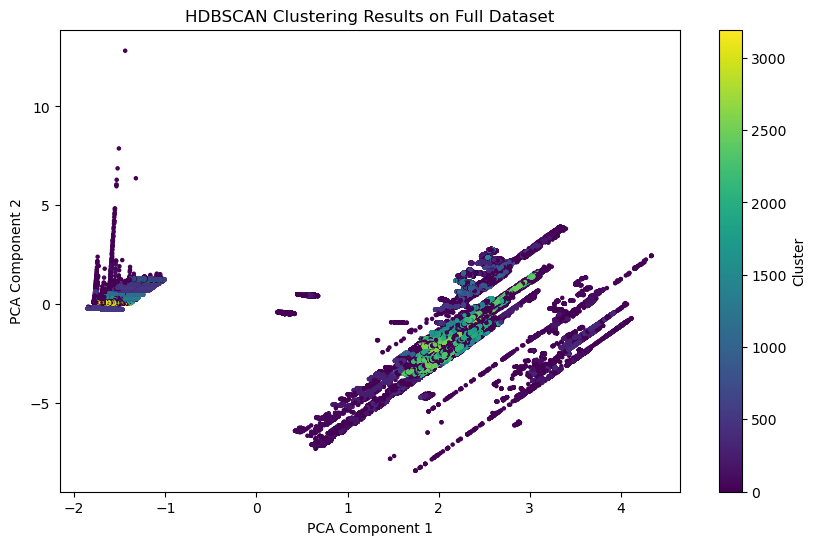

In [9]:
import matplotlib.pyplot as plt



# Visualize clustering results

plt.figure(figsize=(10, 6))

plt.scatter(clustering_data_reduced[:, 0], clustering_data_reduced[:, 1], c=clusters, cmap='viridis', s=5)

plt.colorbar(label='Cluster')

plt.xlabel('PCA Component 1')

plt.ylabel('PCA Component 2')

plt.title('HDBSCAN Clustering Results on Full Dataset')

plt.show()

**4. XGBoost**

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


In [61]:
xgboost_df = kmeans_df.copy()
print(xgboost_df.shape)
print(xgboost_df.info())
xgboost_df.head()

(1158540, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158540 entries, 0 to 1158539
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Latitude             1158540 non-null  float64
 1   Longitude            1158540 non-null  float64
 2   Pop_Density_2000     1158540 non-null  float64
 3   Pop_Density_2001     1158540 non-null  float64
 4   Pop_Density_2002     1158540 non-null  float64
 5   Pop_Density_2003     1158540 non-null  float64
 6   Pop_Density_2004     1158540 non-null  float64
 7   Pop_Density_2005     1158540 non-null  float64
 8   Pop_Density_2006     1158540 non-null  float64
 9   Pop_Density_2007     1158540 non-null  float64
 10  Pop_Density_2008     1158540 non-null  float64
 11  Pop_Density_2009     1158540 non-null  float64
 12  Pop_Density_2010     1158540 non-null  float64
 13  Pop_Density_2011     1158540 non-null  float64
 14  Pop_Density_2012     1158540 non-nul

,Latitude,Longitude,Pop_Density_2000,Pop_Density_2001,Pop_Density_2002,Pop_Density_2003,Pop_Density_2004,Pop_Density_2005,Pop_Density_2006,Pop_Density_2007,...,Pop_Density_2015,Pop_Density_2016,Pop_Density_2017,Pop_Density_2018,Pop_Density_2019,Pop_Density_2020,Wind_Speed,Grid_Value,Income_Distribution,Cluster
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011,6.410498,0,42,0
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807,6.410498,0,42,0
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050,6.410498,0,42,0
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067,6.410498,0,42,0
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289,6.410498,0,42,0


In [68]:

X = xgboost_df.drop('Cluster', axis=1)  
y = xgboost_df['Cluster']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)



xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136106
           1       1.00      1.00      1.00     95602

    accuracy                           1.00    231708
   macro avg       1.00      1.00      1.00    231708
weighted avg       1.00      1.00      1.00    231708

